# Analiza matematyczna z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 2

### Przygotowanie do pracy

Uzupełnij poniższą zmienną `IMIE_NAZWISKO` swoim imieniem i nazwiskiem, a następnie ją uruchom - dzięki temu sprawdzisz, czy kernel Pythona działa poprawnie.

In [48]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Załadujmy niezbędne biblioteki:

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

### Aproksymacja funkcji jednej zmiennej

Zagadnienie aproksymacji funkcji jednej zmiennej omówimy na przykładzie aproksymacji zadanej funkcji $f(x)$ liniową kombinacją wielomianów Czebyszewa pierwszego rodzaju.

Będziemy starali się przybliżyć funkcję $f(x)$ poprzez dopasowanie do niej ważonej sumy wielomianów Czebyszewa. Będzie to wymagało od nas obliczenia wartości funkcji $f(x)$ w punktach próbkowania w celu utworzenia współczynników wagowych.

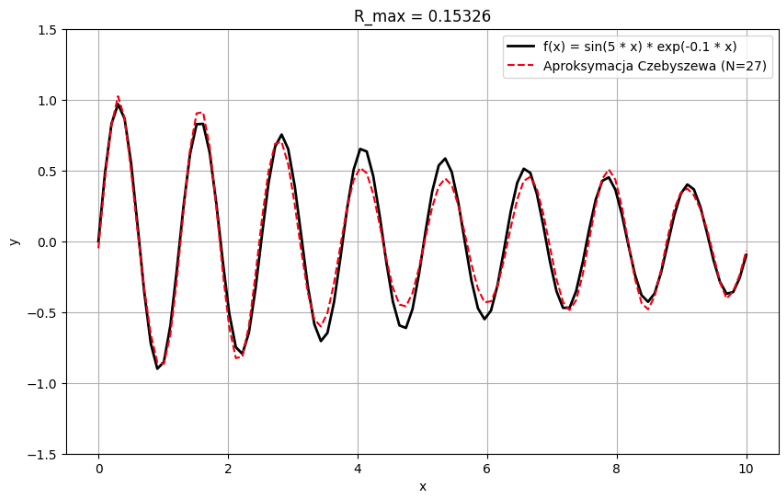

Niech $f(x)$ oznacza funkcję rzeczywistą jednej zmiennej określoną co najmniej
w przedziale $[-1; 1]$ (w dalszej części zajęć będzie nas interesował przedział $[t_a;t_b]$). Funkcję tę w przedziale $[-1; 1]$ można aproksymować skończoną, liniową kombinacją wielomianów Czebyszewa pierwszego rodzaju $T_j(x)$ ważonych współczynnikami $c_j$:

$$P_M(x) = c_0 T_0(x) + c_1 T_1(x) + c_2 T_2(x) + \cdots + c_M T_M(x) = \sum_{j=0}^M c_j T_j(x) $$

Przejdziemy po kolei przez poszczególne kroki prowadzące nas do zaimplementowania tego algorytmu aproksymacji. Podczas implementacji **nie korzystaj** z gotowych funkcji NumPy i SciPy zawartych w modułach `np.polynomial` i `scipy.interpolate` - podczas zajęć będziemy chcieli zaimplementować algorytm od podstaw.

#### Wielomiany Czebyszewa

##### Zadanie 1 (2 pkt.)

Zacznijmy od napisania funkcji `T(n, x)`, która obliczy dla nas wartości wielomianów $T_n(x)$. Wartości oblicza się według następujących wzorów:

* $T_0(x)=1$
* $T_1(x)=x$
* $T_2(x)=2x^2-1$
* $\ldots$
* $T_n(x)=2x T_{n-1}(x) - T_{n-2}(x),\qquad n=2,3,4, \ldots$

| Test | Oczekiwany wynik |
| ---- | ---------------- |
| `T(0, 1)` | `1` |
| `T(0, 3)` | `1` |
| `T(1, 1)` | `1` |
| `T(1, 3)` | `3` |
| `T(1, 5)` | `5` |
| `T(2, 1)` | `1` |
| `T(2, 3)` | `17` |
| `T(2, 5)` | `49` |
| `T(5, 1)` | `1` |
| `T(5, 3)` | `3363` |
| `T(5, 5)` | `47525` |

In [50]:
def T(n, x):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    if n == 0: return 1
    if n == 1: return x
    return 2*x*T(n-1, x) - T(n-2, x)

----

Po zaimplementowaniu funkcji `T(n, x)` możemy wyświetlić ich graficzną reprezentację. Poniższy widżet prezentuje $T_j(x)$ dla $j \in \{0, 1, 2, 3, 4, 5\}$. Możemy zauważyć, że w przedziale domkniętym $[-1; 1]$ przyjmują one wartości ekstremalne równe $1$ lub $-1$.

In [51]:
def plot_chebfun(T0, T1, T2, T3, T4, T5):
    
    plt.figure(figsize=(10, 6))
    colors = ["red", "green", "blue", "orange", "pink", "gray"]

    X = np.linspace(-1, 1, 100)
    for i, Ti in enumerate([T0, T1, T2, T3, T4, T5]):
        if Ti:
            Y = T(i, X)
            plt.plot(X, Y, label=f'T_{i}(x)', color=colors[i], linewidth=2)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.ylim(-1.1, 1.1)
    plt.show()

interactive(plot_chebfun,
            T0 = widgets.Checkbox(value=False, description='T_0(x)'),
            T1 = widgets.Checkbox(value=False, description='T_1(x)'),
            T2 = widgets.Checkbox(value=False, description='T_2(x)'),
            T3 = widgets.Checkbox(value=True,  description='T_3(x)'),
            T4 = widgets.Checkbox(value=False, description='T_4(x)'),
            T5 = widgets.Checkbox(value=False, description='T_5(x)')
)

interactive(children=(Checkbox(value=False, description='T_0(x)'), Checkbox(value=False, description='T_1(x)')…

#### Węzły interpolacyjne

##### Zadanie 2 (1 pkt)

W przedziale $[-1, 1]$ wielomian $T_n(x)$ przyjmuje wartości równe zeru dla:

$$x_i = \cos \left( \dfrac{2i+1}{2n}\pi \right), \qquad i=0,\ldots,n-1.$$

Wartości te nazywane są *węzłami interpolacyjnymi Czebyszewa*, ponieważ są one współrzędnymi punktów przecięcia (wspólnych) wielomianu $T_n(x)$ i aproksymowanej funkcji $f(x) = 0$.

Zaimplementuj poniższą funkcję `chebyshev_nodes(n)`, która zwraca $n$ węzłów interpolacyjnych Czebyszewa jako tablicę `np.array`.

| Test | Oczekiwany wynik |
| ---- | ---------------- |
| `chebyshev_nodes(1)` | `array([6.123234e-17])` |
| `chebyshev_nodes(2)` | `array([ 0.70710678, -0.70710678])` |
| `chebyshev_nodes(3)` | `array([ 8.66025404e-01,  6.12323400e-17, -8.66025404e-01])` |
| `chebyshev_nodes(4)` | `array([ 0.92387953,  0.38268343, -0.38268343, -0.92387953])` |
| `chebyshev_nodes(5)` | `array([ 9.51056516e-01,  5.87785252e-01,  6.12323400e-17, -5.87785252e-01, -9.51056516e-01])` |
| `type(chebyshev_nodes(5))` | `numpy.ndarray` |
| `chebyshev_nodes(5).dtype` | `dtype('float64')` |
| `chebyshev_nodes(5).shape` | `(5,)` |

In [52]:
def chebyshev_nodes(n):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    T = []
    for i in range(n):
        T.append(np.cos(((2*i + 1)*np.pi)/(2*n)))
    return np.array(T)

chebyshev_nodes(1)

array([6.123234e-17])

----

Możemy teraz zwizualizować miejsca zerowe $T_j(x)$ dla $j \in \{0, 1, 2, 3, 4, 5\}$ na przedziale $[-1; 1]$:

In [53]:
def plot_chebnodes(T0, T1, T2, T3, T4, T5):
    
    plt.figure(figsize=(10, 6))
    colors = ["red", "green", "blue", "orange", "pink", "gray"]

    X = np.linspace(-1, 1, 100)
    for i, Ti in enumerate([T0, T1, T2, T3, T4, T5]):
        if Ti:
            Y = T(i, X)
            plt.plot(X, Y, label=f'T_{i}(x)', color=colors[i], linewidth=2)
            nodes = chebyshev_nodes(i)
            if len(nodes) > 0:
                plt.plot(nodes, [0]*len(nodes), 'o', color=colors[i], alpha=0.45, label=f'T_{i}(x) nodes')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.ylim(-1.1, 1.1)
    plt.show()

interactive(plot_chebnodes,
            T0 = widgets.Checkbox(value=False, description='T_0(x)'),
            T1 = widgets.Checkbox(value=False, description='T_1(x)'),
            T2 = widgets.Checkbox(value=False, description='T_2(x)'),
            T3 = widgets.Checkbox(value=True,  description='T_3(x)'),
            T4 = widgets.Checkbox(value=False, description='T_4(x)'),
            T5 = widgets.Checkbox(value=False, description='T_5(x)')
)

interactive(children=(Checkbox(value=False, description='T_0(x)'), Checkbox(value=False, description='T_1(x)')…

#### Skalowanie węzłów

##### Zadanie 3 (0.5 pkt.)

Jedną z potrzebnych nam funkcji pomocniczych będzie funkcja skalująca obliczone węzły interpolacyjne Czebyszewa (będące w przedziale $[-1; 1]$) do zadanego przedziału $[t_a; t_b]$:

$$t(x) = \dfrac{1}{2}\left[ (1-x)t_a + (1+x)t_b \right]$$

Zaimplementuj funkcję `scale_nodes(X, t_a, t_b)` przyjmując, że `X` jest tablicą `np.array` zawierającą węzły interpolacyjne Czebyszewa, a sama funkcja również zwraca tablicę `np.array`. Zauważ, że nie musisz przechodzić w pętli po elementach `X`, tylko wprost skorzystać z wektoryzacji obliczeń.

| Test | Oczekiwany wynik |
| ---- | ---------------- |
| `scale_nodes(chebyshev_nodes(1), -2, 2)` | `array([1.11022302e-16])` |
| `scale_nodes(chebyshev_nodes(2), 0, 10)` | `array([8.53553391, 1.46446609])` |
| `scale_nodes(chebyshev_nodes(3), -2, 2)` | `array([ 1.73205081e+00,  1.11022302e-16, -1.73205081e+00])` |
| `type(scale_nodes(chebyshev_nodes(3), -2, 2))` | `numpy.ndarray` |
| `scale_nodes(chebyshev_nodes(3), -2, 2).dtype` | `dtype('float64')` |
| `scale_nodes(chebyshev_nodes(3), -2, 2).shape` | `(3,)` |

In [54]:
def scale_nodes(X, t_a, t_b):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    return (1/2)*((1-X)*t_a + (1+X)*t_b)

scale_nodes(chebyshev_nodes(1), -2, 2)

array([1.11022302e-16])

#### Współczynniki wagowe

##### Zadanie 4 (1 pkt)

Kolejnym krokiem jest obliczenie współczynników wagowych $c_j$. Samo wyprowadzenie wzorów jest dość obszerne (por. S. Rosłoniec (2020). _Aproksymacja liniową kombinacją wielomianów Czebyszewa pierwszego rodzaju_ w: _Wybrane metody numeryczne z przykładami zastosowań w zadaniach inżynierskich_, str. 168-169. Wyd. 3, Oficyna Wydawnicza Politechniki Warszawskiej), zatem w tym miejscu ograniczymy się do podania ich końcowej formy:

$$c_i = \dfrac{2}{N} \sum_{k=0}^{N-1} f(t_k) T_i(x_k), \qquad 1 \leq i < N$$

$$c_0 = \dfrac{1}{N} \sum_{k=0}^{N-1} f(t_k) T_0(x_k), \qquad i = 0$$

*Uwaga*: $x_k$ to węzły interpolacyjne Czebyszewa, natomiast $t_k$ to węzły $x_k$ przeskalowane do przedziału $[t_a; t_b]$, z kolei $f$ to aproksymowana funkcja.

Zaimplementuj funkcję `chebyshev_coeffs(N, x_k, f_t_k)`, gdzie `x_k` to wartości węzłów interpolacyjnych Czebyszewa, a `f_t_k` to wartości aproksymowanej funkcji $f$ w przeskalowanych do $[t_a;t_b]$ węzłach interpolacyjnych Czebyszewa $x_k$ (czyli $f(t_k)$). Jako wynik zwróć tablicę `np.array`.

Przypadek testowy:

```python
_N = 6
_x_k = np.array([0.966, 0.707, 0.259, -0.259, -0.707, -0.966])
_f_t_k = np.array([2.627, 2.028, 1.295, 0.772, 0.493, 0.380])

_result = chebyshev_coeffs(_N, _x_k, _f_t_k)
print(_result)
print(_result.dtype)
print(_result.shape)
```

Oczekiwany wynik:

```plaintext
[1.26583333 1.13043467 0.27151723 0.04477    0.00588153 0.00179807]
float64
(6,)
```

In [55]:
def chebyshev_coeffs(N, x_k, f_t_k):    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    Ta = []
    s = 0
    for i in range(N):
        s += f_t_k[i]*T(0, x_k[i])
    Ta.append((1/N)*s)
    for j in range(1, N):
        s = 0
        for i in range(N):
            s += f_t_k[i]*T(j, x_k[i])
        Ta.append((2/N)*s)

    return np.array(Ta)


_N = 6
_x_k = np.array([0.966, 0.707, 0.259, -0.259, -0.707, -0.966])
_f_t_k = np.array([2.627, 2.028, 1.295, 0.772, 0.493, 0.380])

_result = chebyshev_coeffs(_N, _x_k, _f_t_k)
print(_result)
print(_result.dtype)
print(_result.shape)

[1.26583333 1.13043467 0.27151723 0.04477    0.00588153 0.00179807]
float64
(6,)


#### Skalowanie do $[-1; 1]$

##### Zadanie 5 (0.5 pkt.)

Aby metoda aproksymacji działała na przedziale $[t_a;t_b]$ potrzebujemy również metody przekształacającej wartości z przedziału $[t_a;t_b]$ na $[-1;1]$. Możemy do tego wykorzystać poniższe przekształcenie:

$$u(x) = -1 + 2 \dfrac{x - t_a}{t_b - t_a}$$

Zaimplementuj poniższą funkcję `rescale_points(X, t_a, t_b)`.

| Test | Oczekiwany wynik |
| ---- | ---------------- |
| `rescale_points(np.array([2, 4, 6]), 2, 6)` | `array([-1.,  0.,  1.])` |
| `rescale_points(np.array([-5, 2]), -5, 2)` | `array([-1.,  1.])` |
| `rescale_points(np.array([1, 2, 3, 4]), 0, 5)` | `array([-0.6, -0.2,  0.2,  0.6])` |
| `rescale_points(np.linspace(2, 8, 9), 2, 8)` | `array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])` |
| `type(rescale_points(np.linspace(2, 8, 9), 2, 8))` | `numpy.ndarray` |
| `rescale_points(np.linspace(2, 8, 9), 2, 8).dtype` | `dtype('float64')` |
| `rescale_points(np.linspace(2, 8, 9), 2, 8).shape` | `(9,)` |

In [56]:
def rescale_points(X, t_a, t_b):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    return -1 + 2*(X - t_a)/(t_b - t_a)

print(rescale_points(np.array([2, 4, 6]), 2, 6))


[-1.  0.  1.]


#### Obliczenie maksymalnego błędu aproksymacji

##### Zadanie 6 (0.5 pkt.)

Ostatnią funkcją pomocniczą będzie obliczenie maksymalnego bezwzględnego odchylenia wartości aproksymowanych $P_N(x_i) = \tilde{y_i}$ od rzeczywistych wartości funkcji $f(x_i) = y_i$:

$$R_{\max} := \max_i |y_i - \tilde{y_i}|$$

Zaimplementuj poniższą funkcję `calc_Rmax(y_true, y_approx)`.

| Test | Oczekiwany wynik |
| ---- | ---------------- |
| `calc_Rmax(np.array([0.95, 2.3, 3.2]), np.array([1.2, 2.1, 3.4]))` | `0.25` |
| `calc_Rmax(np.array([1.0, 5.0, 2.0, 8.0, 3.0]), np.array([2.0, 4.0, 1.0, 9.0, 5.0]))` | `2.0` |
| `calc_Rmax(np.array([-0.95, -2.3, -3.2]), np.array([1.2, 2.1, 3.4]))` | `6.6` |
| `calc_Rmax(np.array([-0.95, -2.3, -3.2]), np.array([-1.2, -2.1, -3.4]))` | `0.25` |
| `calc_Rmax(np.array([1.1, -2.2, -3.3, 4.4]), np.array([1.1, -2.2, -3.3, 4.4]))` | `0.0` |

In [57]:
def calc_Rmax(y_true, y_approx):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    m = 0
    for i in range(len(y_true)):
        if(m < abs(y_true[i] - y_approx[i])): m = abs(y_true[i] - y_approx[i])
    return m

print(calc_Rmax(np.array([0.95, 2.3, 3.2]), np.array([1.2, 2.1, 3.4])))

0.25


#### Implementacja aproksymacji Czebyszewa

##### Zadanie 7 (3.5 pkt.)

Mam już zaimplementowane wszystkie funkcje pomocnicze, zatem możemy przejść do zaimplementowania aproksymacji Czebyszewa. 

Zaimplementuj poniższą funkcję `my_chebyshev(X, N, f, t_a, t_b)`, gdzie:

* `X` - tablica punktów, w których chcemy obliczyć wartości aproksymowanej funkcji $f$,
* `N` - liczba węzłów Czebyszewa (tj. stopień interpolacji + 1),
* `f` - funkcja $f$, którą aproksymujemy,
* `t_a`, t`_b` - przedział $[t_a;t_b]$, na którym aproksymujemy funkcję $f$.

Co należy zrobić?

1. dla podanego $N$ wyznaczyć węzły Czebyszewa $x_k$,
2. przeskalować powyższe węzły do przedziału $[t_a;t_b]$ otrzymując $t_k$,
3. obliczyć wartości funkcji $f$ w przeskalowanych węzłach otrzymując $f(t_k)$,
4. policzyć współczynniki aproksymacji Czebyszewa $c$,
5. przekształcić punkty z $X$ do przedziału $[-1;1]$ otrzymując $\tilde{X}$,
6. obliczyć wartości aproksymacji w przeskalowanych punktach z $\tilde{X}$, używając wielomianów Czebyszewa $\sum_{j=0}^{N-1} c_j T_j(\tilde{x})$.

Przypadek testowy:

```python
_t_a = 0
_t_b = 4
_X = np.linspace(_t_a, _t_b, 5)
_k = 3
_f = lambda x: 3 * np.exp(-0.1 * x)

_result = my_chebyshev(_X, _k, _f, _t_a, _t_b)
print(_result)
print(type(_result))
print(_result.dtype)
print(_result.shape)
```

Oczekiwany wynik:

```plaintext
[2.99913737 2.71535312 2.45619226 2.22165479 2.01174071]
<class 'numpy.ndarray'>
float64
(5,)
```

In [58]:
def my_chebyshev(X, N, f, t_a, t_b):    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    nodes = chebyshev_nodes(N)
    s_nodes = scale_nodes(nodes, t_a, t_b)
    f_s_nodes = []
    for el in s_nodes:
        f_s_nodes.append(f(el))
    c = chebyshev_coeffs(N, nodes, f_s_nodes)
    X_f = rescale_points(X, t_a, t_b)
    
    ceb = 0
    for j in range(N):
        ceb += c[j] * T(j, X_f)
    return ceb

_t_a = 0
_t_b = 4
_X = np.linspace(_t_a, _t_b, 5)
_k = 3
_f = lambda x: 3 * np.exp(-0.1 * x)

_result = my_chebyshev(_X, _k, _f, _t_a, _t_b)
print(_result)
print(type(_result))
print(_result.dtype)
print(_result.shape)

[2.99913737 2.71535312 2.45619226 2.22165479 2.01174071]
<class 'numpy.ndarray'>
float64
(5,)


----

Możemy teraz zwizuwalizować aproksymację kilku przykładowych funkcji:

In [59]:
# Przykładowe funkcje do aproksymowania
f1 = {'f':     np.sign,
      'desc':  'f(x) = sign(x)',
      'y_min': -2,
      'y_max':  2,
      't_a':   -2,
      't_b':    2}

f2 = {'f':     lambda x: 3 * np.exp(-0.1*x),
      'desc':  'f(x) = 3 * exp(-0.1 * x)',
      'y_min':  0,
      'y_max':  5,
      't_a':    0,
      't_b':   10}

f3 = {'f':     lambda x: np.sin(5 * x) * np.exp(-0.1 * x),
      'desc':  'f(x) = sin(5 * x) * exp(-0.1 * x)',
      'y_min': -1.5,
      'y_max':  1.5,
      't_a':    0,
      't_b':   10}

In [60]:
# Wykresy
def plot_approximation(fun, N):
    f     = fun['f']
    y_min = fun['y_min']
    y_max = fun['y_max']
    t_a   = fun['t_a']
    t_b   = fun['t_b']
    
    X = np.linspace(t_a, t_b, 100)
    y_true = f(X)
    y_approx = my_chebyshev(X, N, f, t_a, t_b)
    Rmax = calc_Rmax(y_true, y_approx)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, y_true, label=fun['desc'], color='black', linewidth=2)
    plt.plot(X, y_approx, label=f'Aproksymacja Czebyszewa (N={N})', color='red', linestyle='--')
    plt.title(f'R_max = {Rmax:0.5f}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.ylim(y_min, y_max)
    plt.show()

interactive(plot_approximation,
            fun = widgets.Dropdown(
                     options=[(f1['desc'], f1), (f2['desc'], f2), (f3['desc'], f3)],
                     value=f1,
                     description='funkcja:'
            ),
            N = widgets.IntSlider(min=1, max=41, step=1, value=3, description='N:')
)

interactive(children=(Dropdown(description='funkcja:', options=(('f(x) = sign(x)', {'f': <ufunc 'sign'>, 'desc…

#### Poprawka w obliczeniach węzłów interpolacyjnych

##### Zadanie 8 (1 pkt)

Podczas wizualizacji niektórych funkcji możemy zauważyć pewne błędy spowodowane obliczeniami numerycznymi, np. na poniższym wykresie aproksymacja wydaje sie być przesunięta nieco na prawo zamiat przechodzić przez punkt $(0,0)$:

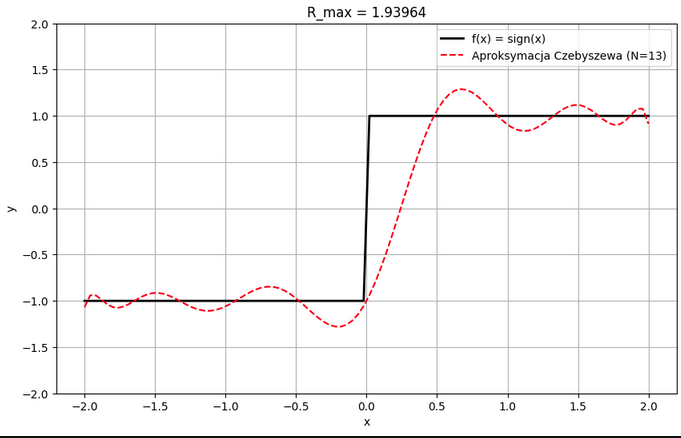

Zauważmy, że obliczając `chebyshev_nodes(1)` otrzymujemy `array([6.123234e-17])`, czyli prawie zero, a z kolei licząc dokładnie otrzymalibyśmy:

$$x_0 = \cos \dfrac{\pi}{2} = 0.$$

Możemy spróbować zaimplementować jeszcze raz funkcję `chebyshev_nodes(n)`, ale tym razem używając biblioteki [SymPy](https://www.sympy.org/en/index.html) do obliczeń symbolicznych. W naszej implementacji zamieniając `np.cos()` na `sp.cos()` oraz `np.pi` na `sp.pi` otrzymamy w wyniku obiekt SymPy, który możemy potem zewaluować przy pomocy metody [`evalf()`](https://docs.sympy.org/latest/modules/evalf.html) lub wywołując na nim metodę [`sp.N()`](https://docs.sympy.org/latest/modules/evalf.html).

W razie problemów por. [krótki tutorial SymPy](https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html) i informacje o [`evalf()`](https://docs.sympy.org/latest/modules/evalf.html).

| Test | Oczekiwany wynik |
| ---- | ---------------- |
| `chebyshev_nodes(1)` | `array([0.])` |
| `chebyshev_nodes(2)` | `array([ 0.70710678, -0.70710678])` |
| `chebyshev_nodes(3)` | `array([ 0.8660254,  0.       , -0.8660254])` |
| `chebyshev_nodes(4)` | `array([ 0.92387953,  0.38268343, -0.38268343, -0.92387953])` |
| `chebyshev_nodes(5)` | `array([ 0.95105652,  0.58778525,  0.        , -0.58778525, -0.95105652])` |
| `type(chebyshev_nodes(5))` | `numpy.ndarray` |
| `chebyshev_nodes(5).dtype` | `dtype('float64')` |
| `chebyshev_nodes(5).shape` | `(5,)` |

In [ ]:
import sympy as sp

def chebyshev_nodes(n):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    Ta = []
    for i in range(n):
        sy = sp.cos(((2*i + 1)*sp.pi)/(2*n))
        Ta.append(sy.evalf())
    return np.array(Ta, dtype=float)

chebyshev_nodes(1)

array([0.])

----

Mając nową implementację `chebyshev_nodes(n)` możemy jeszcze raz zwizualizować aproksymację Czebyszewa:

In [ ]:
interactive(plot_approximation,
            fun = widgets.Dropdown(
                     options=[(f1['desc'], f1), (f2['desc'], f2), (f3['desc'], f3)],
                     value=f1,
                     description='funkcja:'
            ),
            N = widgets.IntSlider(min=1, max=41, step=1, value=3, description='N:')
)

interactive(children=(Dropdown(description='funkcja:', options=(('f(x) = sign(x)', {'f': <ufunc 'sign'>, 'desc…

----

Literatura:

* S. Rosłoniec (2020). _Wybrane metody numeryczne z przykładami zastosowań w zadaniach inżynierskich_. Wyd. 3, Oficyna Wydawnicza Politechniki Warszawskiej.